TASK 1

Read in Mixcancer.csv

In [329]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# seed numpy & disable overflow warnings
np.seterr(all="ignore")
np.random.seed(16)

In [330]:
def load_dataset(split_ratio=0.5):
    # Read in the .csv file and split train test
    data_frame = pd.read_csv('Mixcancer.csv')
    data = data_frame.to_numpy()

    x = data[:, 1:]
    y = data[:, 0]

    y = y.reshape(len(y), 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_ratio, random_state=0, shuffle=True)

    return x_train, y_train, x_test, y_test


In [331]:

class ANN:
    def __init__(self, batch_size=128, learning_rate=0.01, epochs=500):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1.0-self.sigmoid(x))

    def reLu(self, v):
        return np.maximum(v,0)

    def reLu_der(self, v):
        v[v<=0] = 0
        v[v>0] = 1
        return v

    def cross_entropy(self, x, y):
        return (-y*(np.log(x)) - (1-y) * np.log(1-x))

    def cross_entropy_derivative(self, x, y):
        return -(y/x - (1-y)/(1-x))

    def train(self, x_train, y_train):
        # Initialize weights and bias
        self.w1 = np.random.uniform(-1,1,[len(x_train[0]),5]) #weights of the first layer
        self.b1 = np.zeros([1,5]) #bias of the first layer
        self.w2 = np.random.uniform(-1,1,[5,1]) #weights of the first layer
        self.b2 = 0 #bias of the first layer

        epoch_error = []
        epoc_accuracy = []

        for _ in range(self.epochs):
            # Mini batches data shuffled on each epoch
            random_indices = np.arange(x_train.shape[0])
            np.random.shuffle(random_indices)

            # For each mini batch
            mini_batch_train_errors = []
            mini_batch_train_accuracies = []
            for i in range(0, random_indices.shape[0], self.batch_size):
                x_batch = x_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                in1 = x_batch@self.w1 + self.b1
                o1 = self.sigmoid(in1)
                in2 = o1@self.w2 + self.b2
                o2 = self.sigmoid(in2)

                # Error
                error = self.cross_entropy(o2 ,y_batch).mean()

                # Accuracy
                pred_train = np.where(o2 > 0.5, 1,0)
                accuracy = np.sum(pred_train == y_batch) / float(y_batch.shape[0])
                
                mini_batch_train_errors.append(error)
                mini_batch_train_accuracies.append(accuracy)

                # Backpropagation Layer 2
                dE_dO2 = self.cross_entropy_derivative(o2, y_batch)
                dO2_dIn2 = self.sigmoid_derivative(in2)
                dIn2_dW2 = o1
                dIn2_B2 = 1
                dE_dW2 = (1/x_batch.shape[0])*dIn2_dW2.T@(dE_dO2*dO2_dIn2)
                dE_dB2 = (1/x_batch.shape[0])*np.ones([1,len(x_batch)])@(dE_dO2*dO2_dIn2)
                
                # Backpropagation Layer 1
                dIn2_dO1 = self.w2
                dO1_dIn1 = self.sigmoid_derivative(in1)
                dIn1_dW1 = x_batch
                dE_dW1 = (1/x_batch.shape[0])*dIn1_dW1.T@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)
                dE_dB1 = (1/x_batch.shape[0])*np.ones([len(x_batch)])@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)
                
                # Updating parameters
                self.b2-= self.learning_rate * dE_dB2
                self.w2-= self.learning_rate * dE_dW2
                self.b1-= self.learning_rate * dE_dB1
                self.w1-= self.learning_rate * dE_dW1
            
            epoch_error.append(np.mean(mini_batch_train_errors))
            epoc_accuracy.append(np.mean(mini_batch_train_accuracies))

        z=np.arange(self.epochs)
        f1=plt.figure(1)
        plt.plot(z,epoch_error,label="train")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc='best')
        plt.title('Cross entropy loss')

        f2=plt.figure(2)
        plt.plot(z,epoc_accuracy,label="train")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(loc='best')
        plt.title('Training accuracy')


    def evaluate(self, x_test, y_test):
        num = x_test.shape[0]
        num_correct = 0

        in_l1 = x_test@self.w1 + self.b1
        out_l1 = self.sigmoid(in_l1)
        in_l2 = out_l1@self.w2 + self.b2
        out_l2 = self.sigmoid(in_l2)

        pred = np.where(out_l2 > 0.5, 1,0)

        num_correct = np.sum(y_test == pred)
        print(num_correct)
        print("Accuracy: {}".format(num_correct / float(num)))



174
Accuracy: 0.696


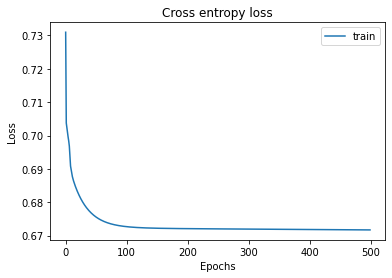

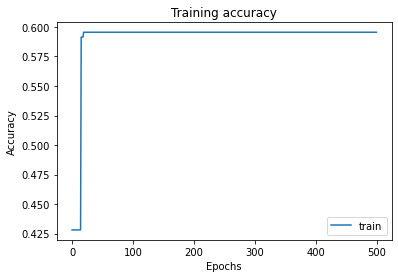

In [332]:
def main():
    x_train, y_train, x_test, y_test = load_dataset(split_ratio=0.5)

    ann = ANN(batch_size=128, learning_rate=0.01, epochs=500)

    ann.train(x_train, y_train)

    ann.evaluate(x_test, y_test)
    
main()